In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import torch

%matplotlib inline

#필요한 패키지 import

In [5]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

ssd_cfg = {
    'num_classes': 21,
    'input_size': 300,
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],
    'feature_maps': [38, 19, 10, 5, 3, 1],
    'steps': [8, 16, 32, 64, 100, 300],
    'min_sizes': [30, 60, 111, 162, 213, 264],
    'max_sizes': [60, 111, 162, 213, 264, 315],
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

net = SSD(phase="inference", cfg=ssd_cfg)

net_weights = torch.load("./drive/MyDrive/Colab Notebooks/2_objectdetection/weights/ssd300_50.pth",
                         map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

print('네트워크 설정 완료: 학습된 가중치를 로드했습니다.')

네트워크 설정 완료: 학습된 가중치를 로드했습니다.


#SSD 추론 실시

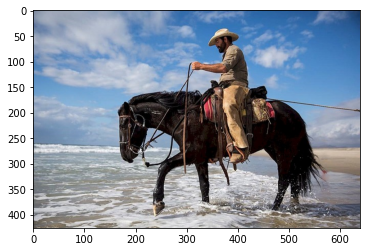

RuntimeError: ignored

In [9]:
from utils.ssd_model import DataTransform

image_file_path = "./drive/MyDrive/Colab Notebooks/2_objectdetection/data/cowboy-757575_640.jpg"
img = cv2.imread(image_file_path)
height, width, channels = img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

color_mean = (104, 117, 123)
input_size = 300
transform = DataTransform(input_size, color_mean)

phase = "val"
img_transformed, boxes, labels = transform(
    img, phase, "", "")
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

net.eval()
x = img.unsqueeze(0)
detections = net(x)

print(detections.shape)
print(detections)

In [10]:
from utils.ssd_predict_show import SSDPredictShow

image_file_path = "./drive/MyDrive/Colab Notebooks/2_objectdetection/data/cowboy-757575_640.jpg"

ssd = SSDPredictShow(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, data_confidence_level=0.6)

RuntimeError: ignored

#화상을 예측하는 클래스 import, 예측과 결과를 화상으로 그림